<a href="https://colab.research.google.com/github/Paulo-Marconi/Analise-Cinema/blob/main/Cinema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

df = pd.read_csv('/content/Cinema - Folha1.csv', header=None)

df.columns = [  'ID',   'Filme', 'Pessoas', 'Data','Cinema','Nota']

df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y', errors='coerce')




df_pessoas = df['Pessoas'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
df
df['Pessoas']

,Pessoas
0,"Aimée,André,Gabs"
1,Amir
2,"Caique,PH,Diogo Leite"
3,"Aimée, Loló,Tio Germano,Tia Débora ,Pedro,Vini..."
4,Amir
5,Sozinho
6,"Aimée,Gabs,Bruna"
7,"Aimée,André,Gabs,Luca,Tio G,Luis"
8,"Aimée,André,Gabs"
9,"Aimée,André,Bruna,Gabs,Mãe do André,Lívia,L..."


98


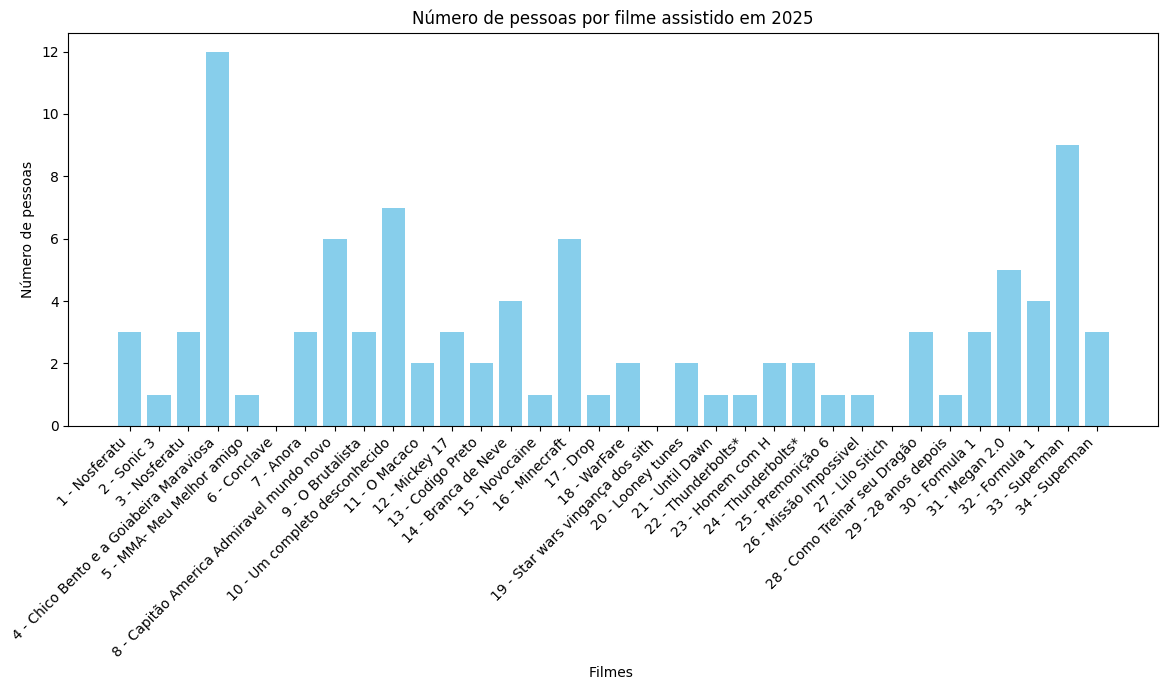

In [8]:
import matplotlib.pyplot as plt

df['Pessoas_Limpo'] = df['Pessoas'].str.split(',').apply(lambda x: [p for p in x if p.strip() != "Sozinho"])

df['Numero_de_Pessoas'] = df['Pessoas_Limpo'].apply(len)

filmes_do_ano = df[df['Data'].dt.year == 2025]
filmes_ordenados = filmes_do_ano.sort_values(by='Data')

filmes_agrupados = filmes_ordenados.groupby(['ID', 'Filme'], as_index=False).agg({
    'Numero_de_Pessoas': 'sum',
    'Data': 'first'
}).sort_values(by='Data')
print(df['Numero_de_Pessoas'].sum())

plt.figure(figsize=(12, 7))
plt.bar(
    filmes_agrupados['ID'].astype(str) + " - " + filmes_agrupados['Filme'],
    filmes_agrupados['Numero_de_Pessoas'],
    color='skyblue'
)
plt.title("Número de pessoas por filme assistido em 2025")
plt.xlabel("Filmes ")
plt.ylabel("Número de pessoas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



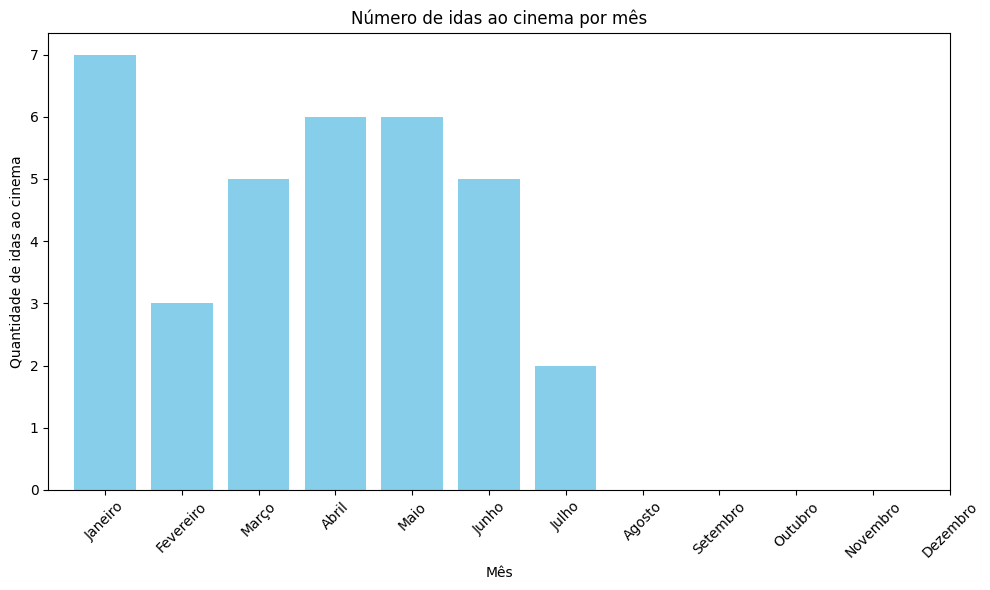

In [9]:
df['Mes'] = df['Data'].dt.month
meses_contagem = df['Mes'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(meses_contagem.index, meses_contagem.values, color='skyblue')
plt.title('Número de idas ao cinema por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de idas ao cinema')
plt.xticks(ticks=range(1, 13), labels=[
    'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
    'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'
], rotation=45)
plt.tight_layout()
plt.show()

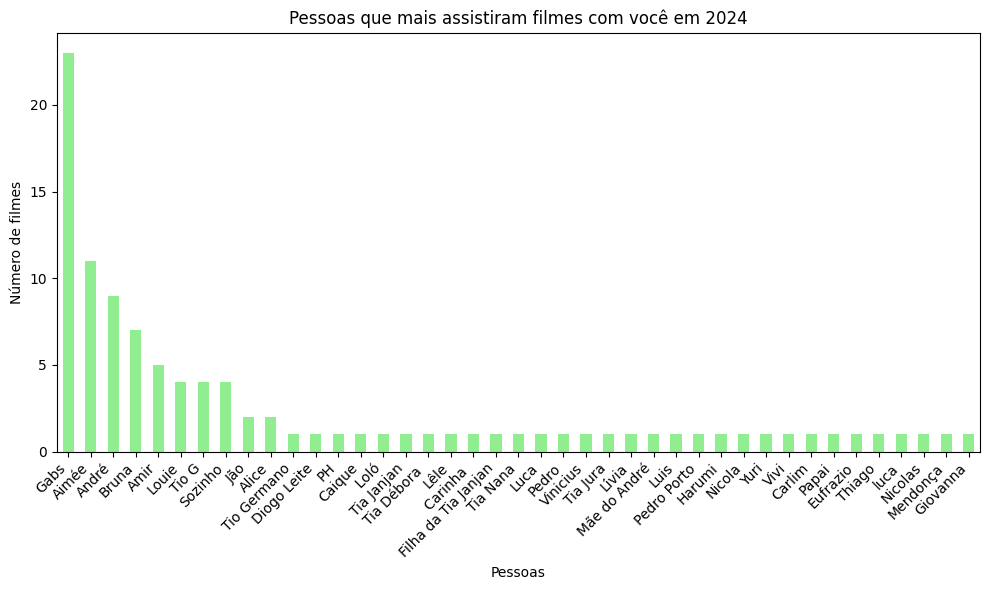

In [10]:
pessoas_filmes = df[df['Data'].dt.year == 2025]['Pessoas'].str.split(',', expand=True).stack()

contagem_pessoas = pessoas_filmes.value_counts()

plt.figure(figsize=(10, 6))
contagem_pessoas.plot(kind='bar', color='lightgreen')
plt.title("Pessoas que mais assistiram filmes com você em 2024")
plt.xlabel("Pessoas")
plt.ylabel("Número de filmes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


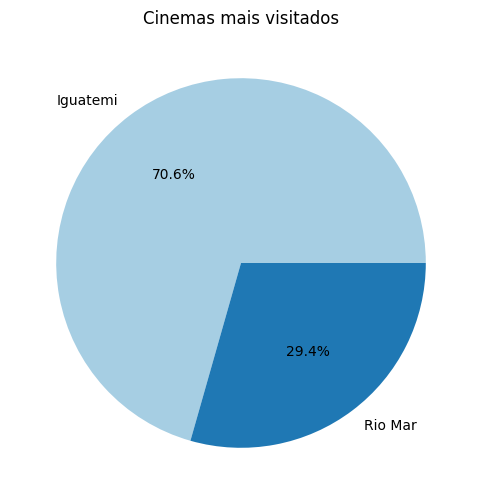

In [11]:
cinema_counts = df['Cinema'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cinema_counts, labels=cinema_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Cinemas mais visitados")
plt.show()

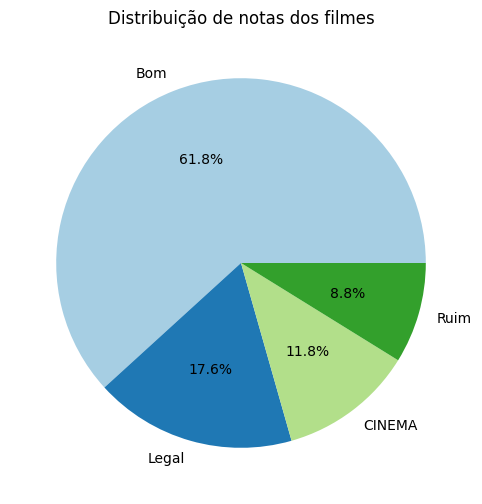

In [12]:
nota_counts = df['Nota'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(nota_counts, labels=nota_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribuição de notas dos filmes")
plt.show()